In [74]:
## Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [75]:
df = pd.read_csv('data/raw.csv')

In [76]:
df = df.drop(columns=['Unnamed: 0'])

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [78]:
## missing values
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [79]:
df.duplicated().sum()

np.int64(29)

In [80]:
##droping the duplicates
df = df.drop_duplicates()

In [81]:
df.shape

(1274, 11)

In [82]:
## stats
df.describe()

,Inches,Price
count,1274.000000,1274.000000
mean,15.022449,60503.185074
std,1.429940,37333.222977
min,10.100000,9270.720000
25%,14.000000,32495.605200
50%,15.600000,52693.920000
75%,15.600000,79773.480000
max,18.400000,324954.720000


In [83]:
df['Ram(GB)'] = df.Ram.apply(lambda x:x.split('GB')[0])
df['Weight(kg)'] =df.Weight.apply(lambda x:x.split('kg')[0]).astype('float')
#df = df.drop('Ram',axis=1)

In [84]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ram(GB),Weight(kg)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,4,2.20
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,4,1.80
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,16,1.30
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,2,1.50


In [85]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [86]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [87]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [88]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [89]:
def fun(x):
    if 'Intel Core i3' in x:
        return 'Intel Core i3'
    if 'Intel Core i5' in x:
        return 'Intel Core i5'
    if 'Intel Core i7' in x:
        return 'Intel Core i7'
    if 'AMD' in x:
        return 'AMD'
    if 'Intel Celeron' in x:
        return 'Intel Celeron'
    return "Other Intel"

In [90]:
df['Cpu(processor)'] = df['Cpu'].apply(fun)

In [91]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ram(GB),Weight(kg),Cpu(processor)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.37,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.34,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.86,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.83,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.37,Intel Core i5


In [92]:
def fun2(x):
    if 'Intel' in x:
        return 'Intel'
    if 'AMD' in x:
        return 'AMD'
    return 'Nvidia'

In [93]:
df['Gpu(I,N,A)Brand']= df.Gpu.apply(fun2)

In [94]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ram(GB),Weight(kg),Cpu(processor),"Gpu(I,N,A)Brand"
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.37,Intel Core i5,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.34,Intel Core i5,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.86,Intel Core i5,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.83,Intel Core i7,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.37,Intel Core i5,Intel


#### SSD

In [95]:
def SSD_(x):
    key = ''
    if 'SSD' in x:
        vals = x.split(' ')
        if len(vals)>2:
                if vals[-1]=='Hybrid' or vals[-1]=='HDD':
                    value = vals[0].split('GB')[0]
                    key = key+value
                    
                else:
                    value1 = vals[0].split('GB')[0]
                    value2 = vals[-2].split('GB')[0]
                    add = int(value1)+ int(value2)
                    key = key+str(add)
        else:
            value3 = vals[0].split('GB')[0]
            key = key+value3
    else:
        key=key+str(0)
    return key
        
                
    

### HDD

In [96]:
def HDD_(x):
    key = ''
    if 'HDD' in x:
        vals = x.split(' ')
        if len(vals)>2:
                if vals[1]=='SSD' or ('Flash' in vals):
                    value = vals[-2].split('GB')[0]
                    key = key+value
                    
                else:
                    value1 = vals[0].split('GB')[0]
                    value2 = vals[-2].split('GB')[0]
                    add = value1+value2
                    key = key+str(add)
        else:
            value3 = vals[0].split('GB')[0]
            key = key+value3
    else:
        key=key+str(0)
    return key
        
                
    

### Flash Storage

In [97]:
def Flash_Storage(x):
    key = ''
    if 'Flash' in x:
        vals = x.split(' ')[0].split('GB')
        key= key+vals[0]
    else:
        key=key+str(0)
    return key
        
                
    

### Hybrid

In [98]:
def Hybrid(x):
    key = ''
    if 'Hybrid' in x:
        vals = x.split(' ')
        if len(vals)>2:
                if vals[1]=='SSD':  #'256GB SSD +  1.0TB Hybrid'
                    value = vals[-2].split('GB')[0]
                    key = key+value
                    
                else:
                    value1 = vals[0].split('GB')[0]
                    value2 = vals[-2].split('GB')[0]
                    add = int(value1)+ int(value2)
                    key = key+str(add)
        else:
            value3 = vals[0].split('GB')[0]
            key = key+value3
    else:
        key=key+str(0)
    return key
        
                
    

In [99]:
df['SSD'] = df.Memory.apply(SSD_)
df['HDD'] = df.Memory.apply(HDD_)#.str.replace('.0','')
df['HDD'] =df['HDD'].str.replace('1.0','1',)
df['Flash_Storage'] = df.Memory.apply(Flash_Storage)
df['Hybrid'] = df.Memory.apply(Hybrid)
df['Hybrid'] = df['Hybrid'].str.replace('1.0','1')

In [100]:
df['HDD'].unique()

array(['0', '500', '1TB', '2TB', '1TB1TB', '32', '128'], dtype=object)

### x_res and y_res

In [101]:
def X_res(x):
    if x == '1440x900' or x =='1366x768' or x=='1600x900'  or x == '2560x1440' or x=='1920x1080':
        x_val =x.split('x')[0]
        return x_val
    x = x.split('x')[0].split(' ')[-1]
    return x
def Y_res(x):
    if x == '1440x900' or x =='1366x768' or x=='1600x900'  or x == '2560x1440' or x=='1920x1080':
        y_val =x.split('x')[-1]
        return y_val
    y = x.split('x')[-1]
    return y
df['X_res'] = df.ScreenResolution.apply(X_res).astype('int')
df['Y_res'] = df.ScreenResolution.apply(Y_res).astype('int')

In [102]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ram(GB),Weight(kg),Cpu(processor),"Gpu(I,N,A)Brand",SSD,HDD,Flash_Storage,Hybrid,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,8,1.37,Intel Core i5,Intel,128,0,0,0,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,8,1.34,Intel Core i5,Intel,0,0,128,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,8,1.86,Intel Core i5,Intel,256,0,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,16,1.83,Intel Core i7,AMD,512,0,0,0,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,8,1.37,Intel Core i5,Intel,256,0,0,0,2560,1600


### OS

In [103]:
def os(x):
    key =''
    val=x.split(' ')[0].title()
    if val=='Windows':
        key=key+val
    elif (val=='Macos') or val=='Mac':
        key=key+'Mac'
    elif val=='Linux':
        key=key+val
    else:
        key = key+'Other'
    return key

In [104]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips_display'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS'in x else 0)
df['OS'] = df.OpSys.apply(os)

In [105]:
pd.set_option('display.max_columns',None)

### Converting the TB vaues into GB

#### SSD(GB)

In [106]:
def ssd_gb(x):
    if 'TB'in x:
        val = int(x.split('TB')[0])*1000
        return val
    return x


In [107]:
df['SSD']= df['SSD'].apply(ssd_gb)


#### HDD(GB)

In [108]:
def hdd_gb(x):
    key = ''
    if 'TB' in x:
        val = x.split('TB')
        if len(val)==2:
            val = int(val[0])*1000
            key = key+str(val)
        else:
            val = int(val[0])*1000+int(val[1])*1000
            key = key+str(val)
    else:
        key = key+x
    return key

In [109]:
df['HDD'] = df['HDD'].apply(hdd_gb)

### Hybrid

In [110]:
df['Hybrid'] = df['Hybrid'].apply(ssd_gb)

### PPI Pixel Per Inch

$$
PPI = \frac{\sqrt{X_{\text{res}}^2 + Y_{\text{res}}^2}}{\text{Diagonal Size (in inches)}}
$$

In [111]:
df['PPI'] = np.sqrt(df['X_res']**2 + df['Y_res']**2)/df['Inches']


##### Giving the Categorical Names whether the the Resolution is HD,SD,more than that
| **Resolution**              | **Common PPI Range**  | **PPI Values** |
|----------------------------|----------------------|---------------|
| **SD (480p)**              | **<100 PPI**         | 90.58        |
| **HD (720p, 1280×720)**     | **100 - 150 PPI**    | 100.45, 111.93, 119.72, 127.33, 127.67, 135.09, 141.21, 146.86 |
| **Full HD (1080p, 1920×1080)** | **150 - 200 PPI**    | 157.35, 158.48, 161.72, 165.63, 169.78, 176.23, 189.90, 194.94, 199.69, 200.84 |
| **2K QHD (1440p, 2560×1440)** | **200 - 250 PPI**    | 209.80, 220.53, 220.84, 224.17, 226.41, 226.98, 234.50, 234.97 |
| **4K UHD (2160p, 3840×2160)** | **250 - 350 PPI**    | 254.67, 267.33, 276.05, 282.42, 316.96, 331.26 |
| **5K (5120×2880) / Retina** | **350 - 400 PPI**    | 352.46 |
| **8K UHD (7680×4320)**      | **>400 PPI**         | N/A |


In [112]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'Ram(GB)', 'Weight(kg)',
       'Cpu(processor)', 'Gpu(I,N,A)Brand', 'SSD', 'HDD', 'Flash_Storage',
       'Hybrid', 'X_res', 'Y_res', 'TouchScreen', 'Ips_display', 'OS', 'PPI'],
      dtype='object')

In [113]:
del_cols=['ScreenResolution','Cpu','Ram','Memory','Gpu','Weight','OpSys','Flash_Storage','Hybrid'] #X_res Y_res

In [114]:
df_ = df.copy().drop(del_cols,axis=1)


In [115]:
df_.head()

,Company,TypeName,Inches,Price,Ram(GB),Weight(kg),Cpu(processor),"Gpu(I,N,A)Brand",SSD,HDD,X_res,Y_res,TouchScreen,Ips_display,OS,PPI
0,Apple,Ultrabook,13.3,71378.6832,8,1.37,Intel Core i5,Intel,128,0,2560,1600,0,1,Mac,226.983005
1,Apple,Ultrabook,13.3,47895.5232,8,1.34,Intel Core i5,Intel,0,0,1440,900,0,0,Mac,127.677940
2,HP,Notebook,15.6,30636.0000,8,1.86,Intel Core i5,Intel,256,0,1920,1080,0,0,Other,141.211998
3,Apple,Ultrabook,15.4,135195.3360,16,1.83,Intel Core i7,AMD,512,0,2880,1800,0,1,Mac,220.534624
4,Apple,Ultrabook,13.3,96095.8080,8,1.37,Intel Core i5,Intel,256,0,2560,1600,0,1,Mac,226.983005


### VISUALIZATION


### Compnay Vs CountValues

In [116]:
# df['Company'].value_counts().plot(kind='bar',color='g')
x = df_['Company'].value_counts().reset_index()
px.bar(data_frame=x,x='Company',y='count',title='Company vs Count',color='Company')#color_discrete_sequence=["#3498db"]
#sns.countplot(x='Company',data=df,color='g')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()

- From above barplot i observed that most of the data is belongs to the Dell,Lenovo,Hp,Asus --> companies
- We can do some analysis by only taking these company's laptaps details.

### Operating System vs Count

In [117]:
x = df_['OS'].value_counts().reset_index()
px.bar(data_frame=x,x='OS',y='count',title='OS vs Count',color_discrete_sequence=['#FF0000'])

- Most of the customer are chooses window operating system. (window10,window10S,Windwos7) i am try to reaplace these with just Windows.

### Price Distribution

<Axes: xlabel='Price', ylabel='Count'>

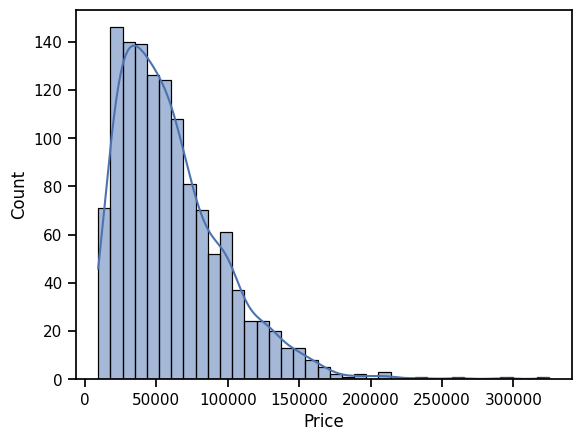

In [118]:
#px.histogram(data_frame=df_,x='Price')
#sns.distplot(df_['Price'])
sns.histplot(df_['Price'],kde=True)

- My target distibution is in right skewed so i am converting it normal distibution with using Log Transformation

### Company vs Price

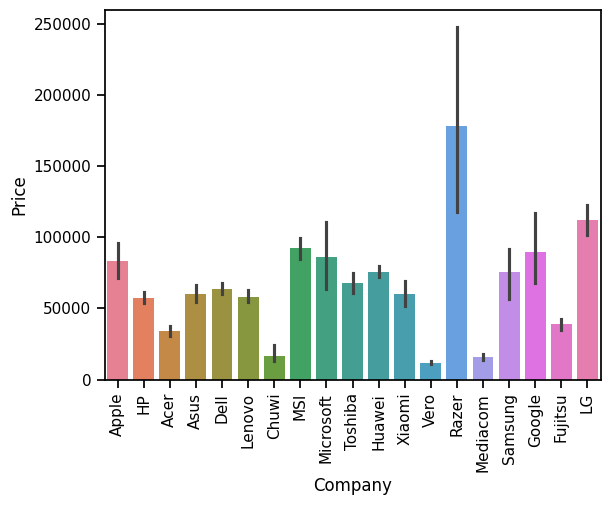

In [119]:
sns.barplot(x='Company',y='Price',hue='Company',data=df_,estimator='mean') #Average Price Company wise.
plt.xticks(rotation=90)
plt.show()

- Razer Company has highest avg price compare to other company's laptop.

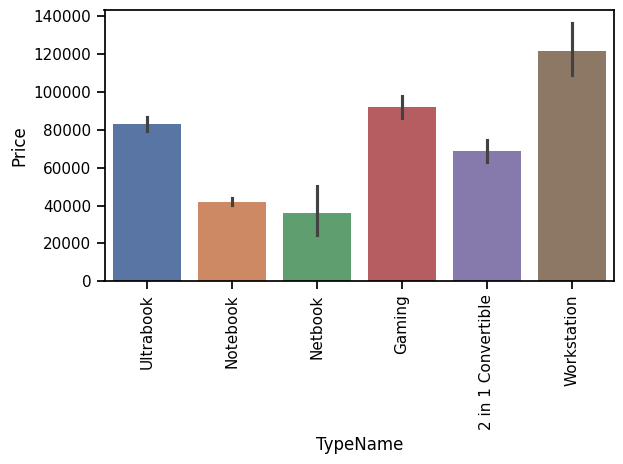

In [120]:
sns.set_palette("deep") 
sns.barplot(x='TypeName',y='Price',hue='TypeName',data=df_,estimator='mean')# Laptap Average Prices with.r.to the Type of Name
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

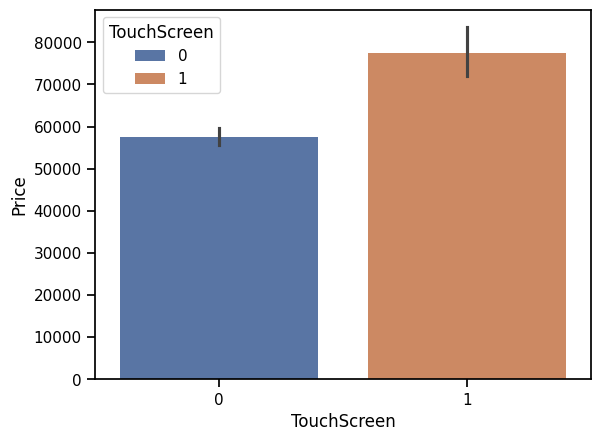

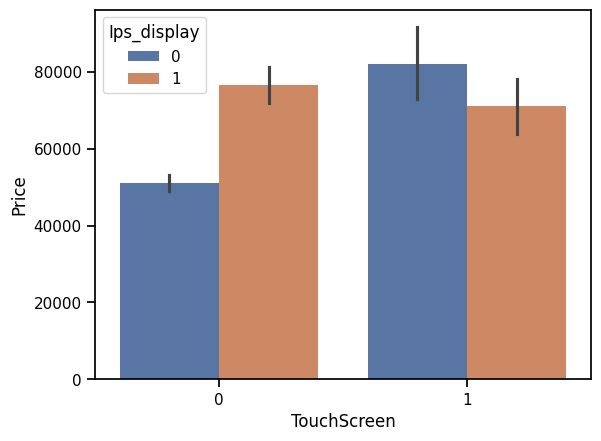

In [121]:

sns.set_context("notebook") 
sns.barplot(x='TouchScreen',y='Price',data=df_ ,hue='TouchScreen')
plt.show()
sns.barplot(x='TouchScreen',y='Price',data=df_ ,hue='Ips_display')
plt.show()

- The laptpos which are having TouchScreen feature will more average price compare to non-touchscreen laptops.
- the laptops which are having the touchscreen and ips display will have the avg price is more.

,Price,Ram(GB)
Price,1.000000,0.740106
Ram(GB),0.740106,1.000000


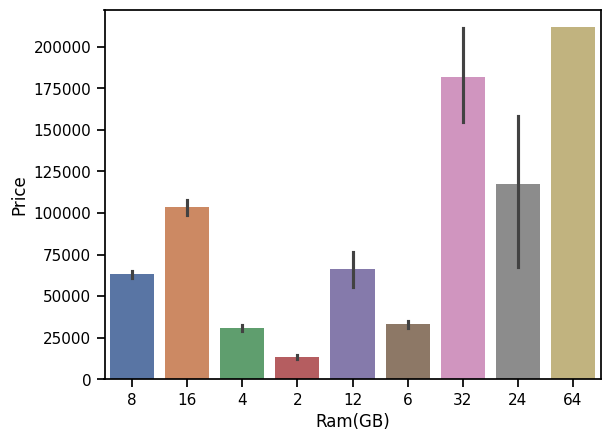

In [122]:
sns.barplot(x='Ram(GB)',y='Price',data=df_,hue='Ram(GB)')
df[['Price','Ram(GB)']].corr()

- The correlation is pretty good. and also basic point as Ram increases then automatically the prices of latptop aslo increases


In [123]:
df_.head()

,Company,TypeName,Inches,Price,Ram(GB),Weight(kg),Cpu(processor),"Gpu(I,N,A)Brand",SSD,HDD,X_res,Y_res,TouchScreen,Ips_display,OS,PPI
0,Apple,Ultrabook,13.3,71378.6832,8,1.37,Intel Core i5,Intel,128,0,2560,1600,0,1,Mac,226.983005
1,Apple,Ultrabook,13.3,47895.5232,8,1.34,Intel Core i5,Intel,0,0,1440,900,0,0,Mac,127.677940
2,HP,Notebook,15.6,30636.0000,8,1.86,Intel Core i5,Intel,256,0,1920,1080,0,0,Other,141.211998
3,Apple,Ultrabook,15.4,135195.3360,16,1.83,Intel Core i7,AMD,512,0,2880,1800,0,1,Mac,220.534624
4,Apple,Ultrabook,13.3,96095.8080,8,1.37,Intel Core i5,Intel,256,0,2560,1600,0,1,Mac,226.983005


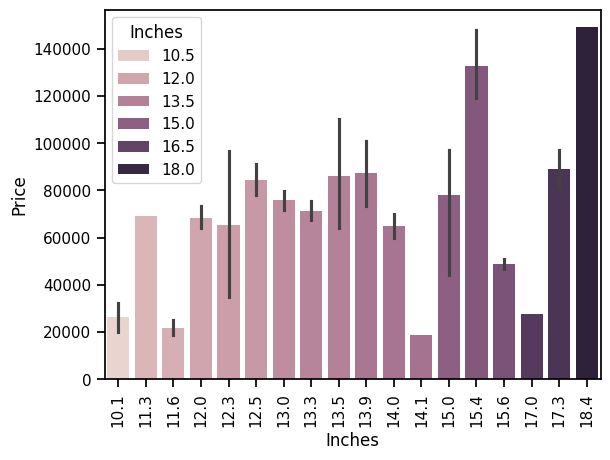

,Inches,Price
Inches,1.00000,0.06699
Price,0.06699,1.00000


In [124]:
sns.barplot(x='Inches',y = 'Price',data=df_,hue='Inches')
plt.xticks(rotation=90)
plt.show()
df_[['Inches','Price']].corr()

- Invertion is there like inches increase then price increasing,decreasing and inches decrease prices increasing and decresing overal it is some positve correlation

In [125]:
df_.head()

,Company,TypeName,Inches,Price,Ram(GB),Weight(kg),Cpu(processor),"Gpu(I,N,A)Brand",SSD,HDD,X_res,Y_res,TouchScreen,Ips_display,OS,PPI
0,Apple,Ultrabook,13.3,71378.6832,8,1.37,Intel Core i5,Intel,128,0,2560,1600,0,1,Mac,226.983005
1,Apple,Ultrabook,13.3,47895.5232,8,1.34,Intel Core i5,Intel,0,0,1440,900,0,0,Mac,127.677940
2,HP,Notebook,15.6,30636.0000,8,1.86,Intel Core i5,Intel,256,0,1920,1080,0,0,Other,141.211998
3,Apple,Ultrabook,15.4,135195.3360,16,1.83,Intel Core i7,AMD,512,0,2880,1800,0,1,Mac,220.534624
4,Apple,Ultrabook,13.3,96095.8080,8,1.37,Intel Core i5,Intel,256,0,2560,1600,0,1,Mac,226.983005


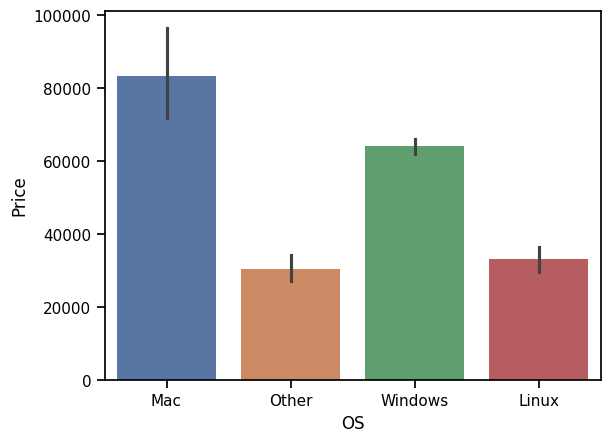

In [126]:
sns.barplot(x='OS',y='Price',data=df_,hue='OS')
plt.show()

- We know that basically Mac(macbook) Os will have high prices compare to windows in our daily life also.

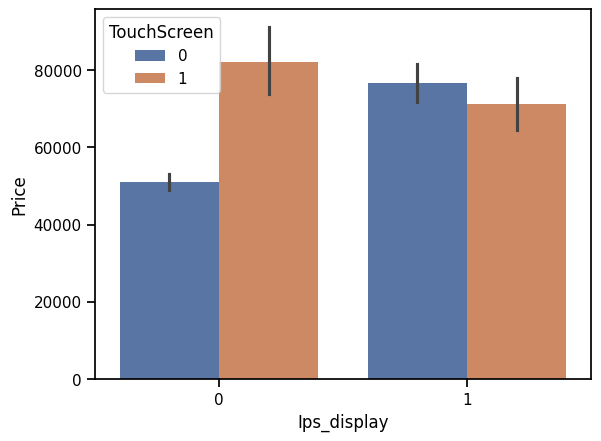

,Ips_display,Price
Ips_display,1.000000,0.250358
Price,0.250358,1.000000


In [127]:
sns.barplot(x='Ips_display',y='Price',hue='TouchScreen',data=df_)
plt.show()
df_[['Ips_display','Price']].corr()

1. The laptops who has the Ips display the avg price is more. and No IPS and having TochScreen has more price
2. Having the ips_dispaly will increase teh prices mean if the ips_disply increases(0,1) then the avg price of laptop also incresing slightly

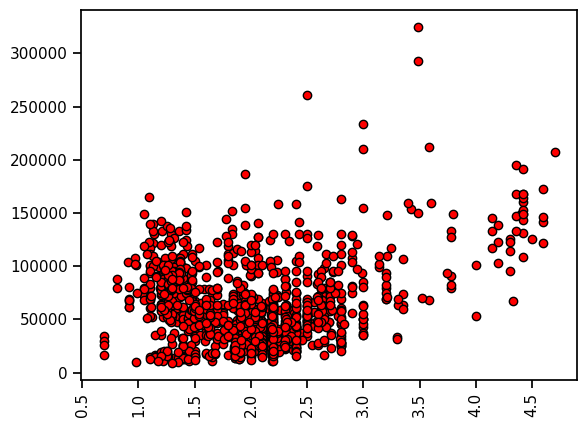

,Weight(kg),Price
Weight(kg),1.000000,0.212192
Price,0.212192,1.000000


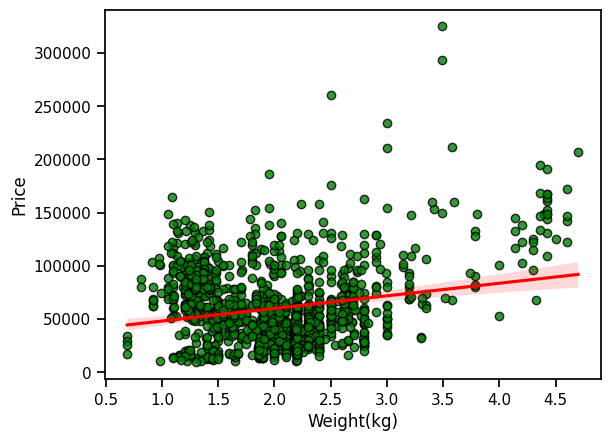

In [128]:
#sns.scatterplot(x='Weight(kg)',y='Price',data=df_)

plt.scatter(df_['Weight(kg)'],df_['Price'],edgecolors='k',color='r')
plt.xticks(rotation=90)
plt.show()
sns.regplot(x='Weight(kg)', y='Price', data=df_, color='g',line_kws={'color': 'r'}, scatter_kws={'edgecolors': 'k'})
df_[['Weight(kg)','Price']].corr()

- 21% variation in linear by wight reaming will influence by the other factors(features)
- Actually this feature is not important to predict the price. only just few people will look into weight but an average person will only the see features of the latop excluding the weight of the laptop. Most of laptaps will have almost avg weight but few is different.


In [129]:
df_.columns

Index(['Company', 'TypeName', 'Inches', 'Price', 'Ram(GB)', 'Weight(kg)',
       'Cpu(processor)', 'Gpu(I,N,A)Brand', 'SSD', 'HDD', 'X_res', 'Y_res',
       'TouchScreen', 'Ips_display', 'OS', 'PPI'],
      dtype='object')

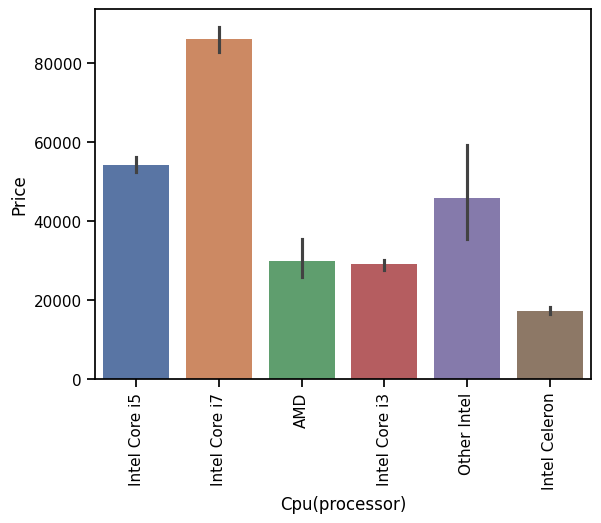

In [130]:
sns.barplot(x='Cpu(processor)',y='Price',data=df_,hue='Cpu(processor)')
plt.xticks(rotation=90)
plt.show()

- The intel i7 processor will have highest avg pric compare to the all other processors

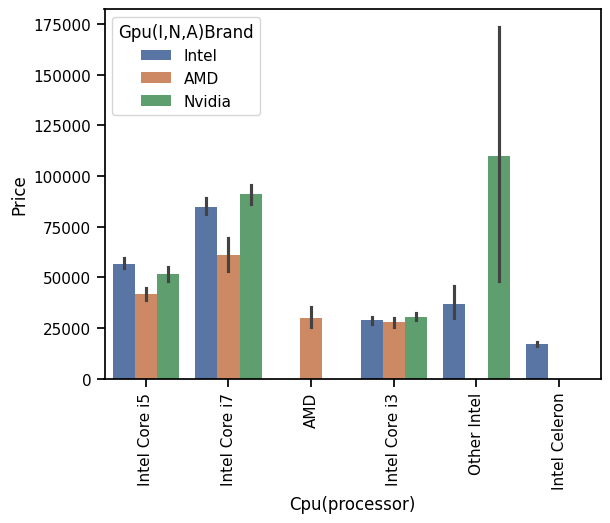

In [131]:
## Cpu processor price with respect to the GPU brand
sns.barplot(x='Cpu(processor)',y='Price',data=df_,hue='Gpu(I,N,A)Brand')
plt.xticks(rotation=90)
plt.show()

- The Avg price of the lattop with cpu with respect to the GPU(Brand)
- The intercorei7 processor have the higest price with respect to all GPU brands.

In [132]:
df_.dtypes

Company             object
TypeName            object
Inches             float64
Price              float64
Ram(GB)             object
Weight(kg)         float64
Cpu(processor)      object
Gpu(I,N,A)Brand     object
SSD                 object
HDD                 object
X_res                int64
Y_res                int64
TouchScreen          int64
Ips_display          int64
OS                  object
PPI                float64
dtype: object

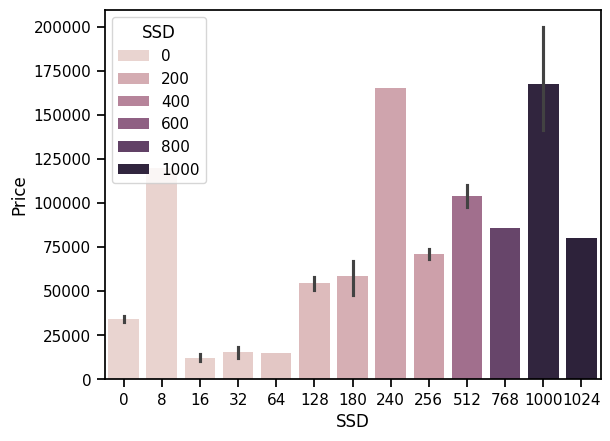

,SSD,Price
SSD,1.000000,0.669957
Price,0.669957,1.000000


In [133]:
sns.barplot(x=df_['SSD'].astype('int'),y= df_["Price"],hue=df_['SSD'].astype('int'))
plt.show()
df_[['SSD','Price']].corr()

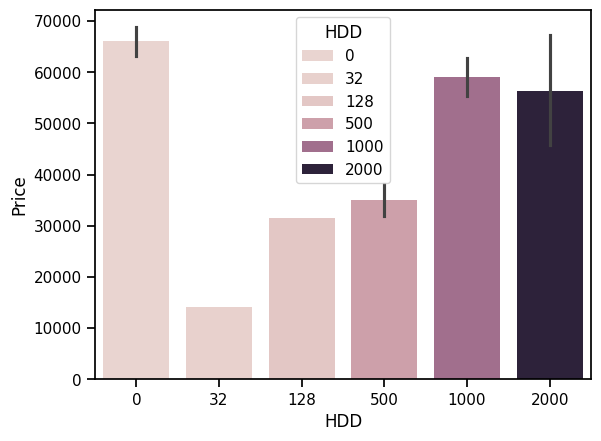

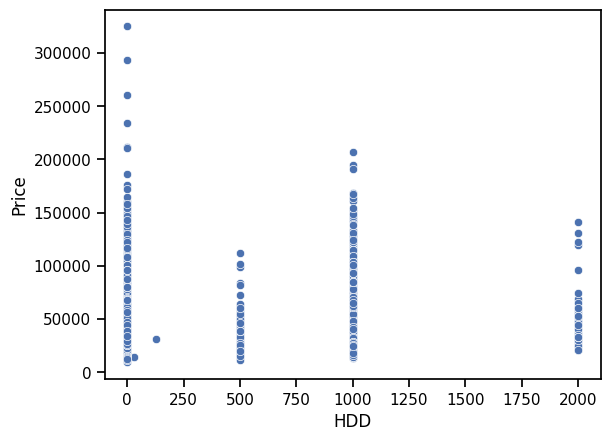

,HDD,Price
HDD,1.000000,-0.098011
Price,-0.098011,1.000000


In [134]:
sns.barplot(x=df_['HDD'].astype('int'),y= df_["Price"],hue = df_['HDD'].astype('int'))
plt.show()
sns.scatterplot(x=df_['HDD'].astype('int'),y=df_["Price"])#hue=df_['SSD'].astype('int'))
plt.show()
df_[['HDD','Price']].corr()

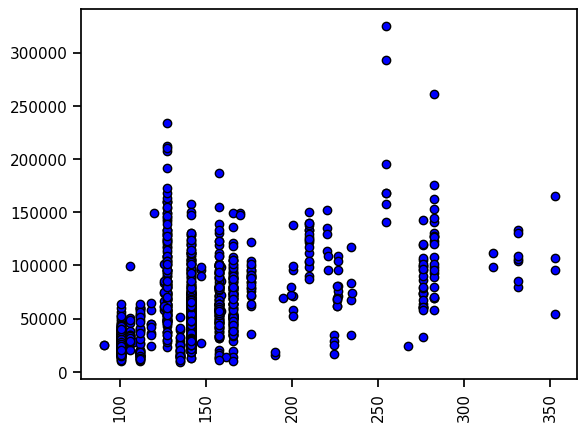

,PPI,Price
PPI,1.000000,0.469539
Price,0.469539,1.000000


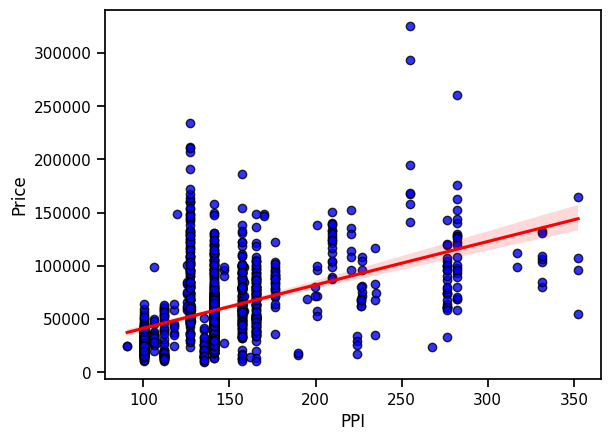

In [135]:

plt.scatter(df_['PPI'],df_['Price'],edgecolors='k',color='blue')
plt.xticks(rotation=90)
plt.show()
sns.regplot(x='PPI', y='Price', data=df_, color='blue',line_kws={'color': 'r'}, scatter_kws={'edgecolors': 'k'})
df_[['PPI','Price']].corr()

In [136]:
df_.head()

,Company,TypeName,Inches,Price,Ram(GB),Weight(kg),Cpu(processor),"Gpu(I,N,A)Brand",SSD,HDD,X_res,Y_res,TouchScreen,Ips_display,OS,PPI
0,Apple,Ultrabook,13.3,71378.6832,8,1.37,Intel Core i5,Intel,128,0,2560,1600,0,1,Mac,226.983005
1,Apple,Ultrabook,13.3,47895.5232,8,1.34,Intel Core i5,Intel,0,0,1440,900,0,0,Mac,127.677940
2,HP,Notebook,15.6,30636.0000,8,1.86,Intel Core i5,Intel,256,0,1920,1080,0,0,Other,141.211998
3,Apple,Ultrabook,15.4,135195.3360,16,1.83,Intel Core i7,AMD,512,0,2880,1800,0,1,Mac,220.534624
4,Apple,Ultrabook,13.3,96095.8080,8,1.37,Intel Core i5,Intel,256,0,2560,1600,0,1,Mac,226.983005


<Axes: xlabel='Price', ylabel='Count'>

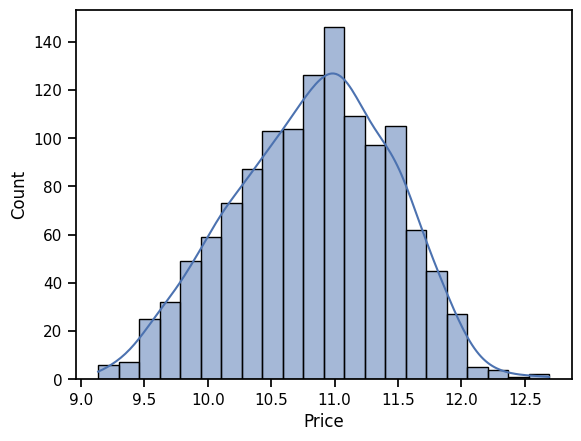

In [137]:
df_["Price"] = np.log(df_['Price'])
sns.histplot(df_['Price'],kde=True)

In [138]:

df_['SSD']=df_['SSD'].astype('int')
df_['HDD']=df_['HDD'].astype('int')
df_['Ram(GB)']=df_['Ram(GB)'].astype('int')

In [139]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1274 non-null   object 
 1   TypeName         1274 non-null   object 
 2   Inches           1274 non-null   float64
 3   Price            1274 non-null   float64
 4   Ram(GB)          1274 non-null   int64  
 5   Weight(kg)       1274 non-null   float64
 6   Cpu(processor)   1274 non-null   object 
 7   Gpu(I,N,A)Brand  1274 non-null   object 
 8   SSD              1274 non-null   int64  
 9   HDD              1274 non-null   int64  
 10  X_res            1274 non-null   int64  
 11  Y_res            1274 non-null   int64  
 12  TouchScreen      1274 non-null   int64  
 13  Ips_display      1274 non-null   int64  
 14  OS               1274 non-null   object 
 15  PPI              1274 non-null   float64
dtypes: float64(4), int64(7), object(5)
memory usage: 169.2+ KB


In [140]:
df_['Resolution'] = df_['X_res'].astype('str')+'x'+df_['Y_res'].astype('str')

In [141]:
### Exporting the final dataset and cleaned dataset.
Cleaned_data = df_.to_csv('data/cleaned_data.csv',index=False)